# Statlog (German_Credit_Data)

Data Set Information

The original dataset contains 1000 entries with 20 categorial/symbolic attributes. In this dataset, each entry represents a person who takes a credit from the bank. Each person is classified as good or bad credit risks according to the set of attributes. 

### Number of Instances:  1000

### Number of Attributes: 21 (21 numerical)


## Attribute description for german

* Attribute 1:  Status_of_existing_account (qualitative)
	       Status of existing checking account
               A11 :      ... <    0 DM
	       A12 : 0 <= ... <  200 DM
	       A13 :      ... >= 200 DM /
		     salary assignments for at least 1 year
               A14 : no checking account

* Attribute 2:  Duration_of_Credit_month (numerical)
	      Duration in month

* Attribute 3:  Payment_Status_of_Previous_Credit(Credit_history) (qualitative)
	      Credit history
	      A30 : no credits taken/
		    all credits paid back duly
              A31 : all credits at this bank paid back duly
	      A32 : existing credits paid back duly till now
              A33 : delay in paying off in the past
	      A34 : critical account/
		    other credits existing (not at this bank)

* Attribute 4:  Purpose_of_loan (qualitative)
	      Purpose
	      A40 : car (new)
	      A41 : car (used)
	      A42 : furniture/equipment
	      A43 : radio/television
	      A44 : domestic appliances
	      A45 : repairs
	      A46 : education
	      A47 : (vacation - does not exist?)
	      A48 : retraining
	      A49 : business
	      A410 : others

* Attribute 5:  Credit_Amount numerical)
	      Credit amount

* Attibute 6:  Value_of_Savings_account&bonds (qualitative)
	      Savings account/bonds
	      A61 :          ... <  100 DM
	      A62 :   100 <= ... <  500 DM
	      A63 :   500 <= ... < 1000 DM
	      A64 :          .. >= 1000 DM
              A65 :   unknown/ no savings account

* Attribute 7:  Years_of_Present_Employment (qualitative)
	      Present employment since
	      A71 : unemployed
	      A72 :       ... < 1 year
	      A73 : 1  <= ... < 4 years  
	      A74 : 4  <= ... < 7 years
	      A75 :       .. >= 7 years

* Attribute 8:  Percentage_of_disposable_income (numerical)
	      Installment rate in percentage of disposable income

* Attribute 9:  Sex_&_Marital_Status (qualitative)
	      Personal status and sex
	      A91 : male   : divorced/separated
	      A92 : female : divorced/separated/married
              A93 : male   : single
	      A94 : male   : married/widowed
	      A95 : female : single

* Attribute 10: Guarantors/Debtors (qualitative)
	      Other debtors / guarantors
	      A101 : none
	      A102 : co-applicant
	      A103 : guarantor

* Attribute 11: Duration_in_Present_Residence (numerical)
	      Present residence since

* Attribute 12: Property (qualitative)
	      Property
	      A121 : real estate
	      A122 : if not A121 : building society savings agreement/
				   life insurance
              A123 : if not A121/A122 : car or other, not in attribute 6
	      A124 : unknown / no property

* Attribute 13: Age_in_years (numerical)
	      Age in years

* Attribute 14: Concurrent_Credits (qualitative)
	      Other installment plans 
	      A141 : bank
	      A142 : stores
	      A143 : none

* Attribute 15: Housing (qualitative)
	      Housing
	      A151 : rent
	      A152 : own
	      A153 : for free

* Attribute 16: No_of_Credits_at_this__Bank (numerical)
              Number of existing credits at this bank

* Attribute 17: Occupation (qualitative)
	      Job
	      A171 : unemployed/ unskilled  - non-resident
	      A172 : unskilled - resident
	      A173 : skilled employee / official
	      A174 : management/ self-employed/
		     highly qualified employee/ officer

* Attribute 18: No_of_dependents (numerical)
	      Number of people being liable to provide maintenance for

* Attribute 19: Telephone (qualitative)
	      Telephone
	      A191 : none
	      A192 : yes, registered under the customers name

* Attribute 20: Foreign_Worker (qualitative)
	      foreign worker
	      A201 : yes
	      A202 : no


## Content

1. **[Import packages](#import_packages)**
2. **[Load data](#load_data)**
3. **[Data preparation](#data_preparation)**
    - 3.1 - [Dimensions of Dataset](#data_dimension)
    - 3.2 - [Statistical Summary](#Stat_sum)
    - 3.3 - [Checking Data Type and Missing Values](#check_data_type)**
4. **[Exploratory Data Analysis](#exploratory_data_analysis)**
    - 4.1 - [Class Distribution](#class_distribution)
    - 4.2 - [Correlation](#Correlation)
5. **[Logistic Regression](#modeling)**
    - 5.1 - [Preparation of datasets](#prep_data)
    - 5.2 - [Building Logistic Regression Base Model](#base_model)
    - 5.3 - [Removing "Credit Amount" variable and building a Logit model](#removing_cre_amt)
    - 5.4 - [Removing "Duration_of_Credit_month" variable and building a Logit model](#credit_month)
    - 5.5 - [Treating Multicollinearity and Building Logit Model](#treat_multicol)
    - 5.6 - [Removing Insignificant Variable](#remove_insig_var)


<a id='import_packages'></a>
# 1. Import Packages

In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='load_data'></a>
# 2. Load Data

In [2]:
# Reading German Credit Data 
raw_data = pd.read_csv("German_Credit_data.csv")
raw_data.head()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


<a id='data_preparation'></a>
# 3. Data Preparation
The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. Here we first analyze the data statistically and then split the target varibles and normalize, followed by splitting the dataframe into numerical and categorical features.

<a id='data_dimension'></a>
# 3.1 Dimensions of Dataset
We get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [3]:
# Shape
raw_data.shape

(1000, 21)

<a id='Stat_sum'></a>
# 3.2 Statistical Summary
Here we take a look at the summary of each attribute.

This includes the count, mean, the min and max values as well as percentiles.

In [4]:
# descriptions

raw_data.describe()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


<a id='check_data_type'></a>
## 3.3 Checking Data Type and Missing Values 

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                             Non-Null Count  Dtype
---  ------                                             --------------  -----
 0   Creditability                                      1000 non-null   int64
 1   Status_of_existing_account                         1000 non-null   int64
 2   Duration_of_Credit_month                           1000 non-null   int64
 3   Payment_Status_of_Previous_Credit(Credit_history)  1000 non-null   int64
 4   Purpose_of_loan                                    1000 non-null   int64
 5   Credit_Amount                                      1000 non-null   int64
 6   Value_of_Savings_account&bonds                     1000 non-null   int64
 7   Years_of_Present_Employment                        1000 non-null   int64
 8   Percentage_of_disposable_income                    1000 non-null   int64
 9   Sex_&_Marital_Status           

There are only 1000 rows in the raw_data data frame and there is no missing values

<a id='exploratory_data_analysis'></a>
# 4. Exploratory Data Analysis

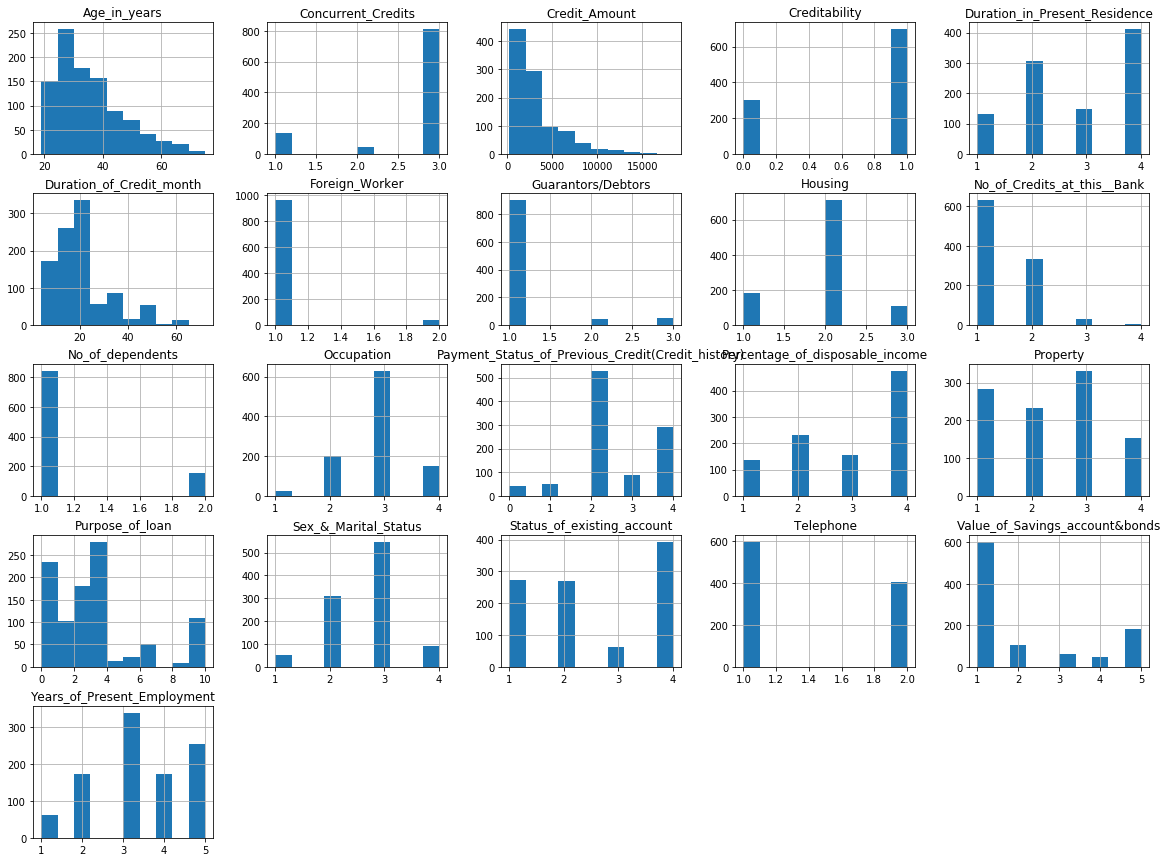

In [6]:
raw_data.hist(figsize=(20,15))
plt.show()

By visualizing the histogram of each variable, we can see "Age_in_years" and "Credit Amount" are not normally distributed. We have to treat those variable before building a model.

In [7]:
# To understand number of levels in each variables 
raw_data.nunique()

Creditability                                          2
Status_of_existing_account                             4
Duration_of_Credit_month                              33
Payment_Status_of_Previous_Credit(Credit_history)      5
Purpose_of_loan                                       10
Credit_Amount                                        923
Value_of_Savings_account&bonds                         5
Years_of_Present_Employment                            5
Percentage_of_disposable_income                        4
Sex_&_Marital_Status                                   4
Guarantors/Debtors                                     3
Duration_in_Present_Residence                          4
Property                                               4
Age_in_years                                          53
Concurrent_Credits                                     3
Housing                                                3
No_of_Credits_at_this__Bank                            4
Occupation                     

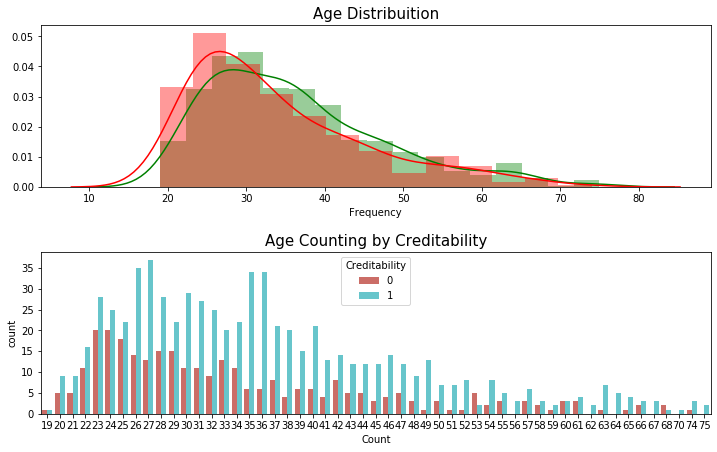

In [8]:
# Ploting Age Distribution
df_good = raw_data[raw_data["Creditability"] == 1]
df_bad = raw_data[raw_data["Creditability"] == 0]

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["Age_in_years"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad["Age_in_years"], ax=ax[0], 
             color='r')
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Age_in_years",data=raw_data, 
              palette="hls", ax=ax[1], 
              hue = "Creditability")
g2.set_title("Age Counting by Creditability", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Count")
plt.show()

<a id='class_distribution'></a>
# 4.1 Class Distribution
Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.

In [9]:
print(raw_data.groupby('Creditability').size())

Creditability
0    300
1    700
dtype: int64


In [10]:
raw_data

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


In [11]:
raw_data['Creditability'].replace({0:1, 1:0}, inplace = True)


In [12]:
# This give you the calulation of the target lebels. Which category of the target lebel is how many percentage.
total_len = len(raw_data['Creditability'])
percentage_labels = (raw_data['Creditability'].value_counts()/total_len)*100
percentage_labels

0    70.0
1    30.0
Name: Creditability, dtype: float64

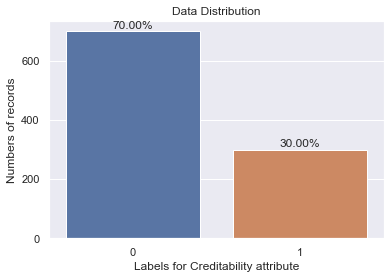

In [13]:
# Graphical representation of the target label percentage.
sns.set()
sns.countplot(raw_data['Creditability']).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=12, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for Creditability attribute")
ax.set_ylabel("Numbers of records")
plt.show()


<a id='Correlation'></a>
# 4.2 Correlation 

In [14]:
# Check Correlation
raw_data.corr()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
Creditability,1.000000,-0.350847,0.214927,-0.228785,0.017979,0.154740,-0.178943,-0.116002,0.072404,-0.088184,...,0.002967,0.142612,-0.091272,-0.109844,-0.018119,-0.045732,0.032735,-0.003015,-0.036466,-0.082079
Status_of_existing_account,-0.350847,1.000000,-0.072013,0.192191,0.028783,-0.042695,0.222867,0.106339,-0.005280,0.043261,...,-0.042234,-0.032260,0.058631,0.068274,0.023335,0.076005,0.040663,-0.014145,0.066296,-0.035187
Duration_of_Credit_month,0.214927,-0.072013,1.000000,-0.077186,0.147492,0.624988,0.047661,0.057381,0.074749,0.014789,...,0.034067,0.303971,-0.037550,-0.062884,0.153126,-0.011284,0.210910,-0.023834,0.164718,-0.134680
Payment_Status_of_Previous_Credit(Credit_history),-0.228785,0.192191,-0.077186,1.000000,-0.090336,-0.059915,0.039058,0.138225,0.044375,0.042171,...,0.063198,-0.053777,0.146337,0.159957,0.061428,0.437066,0.010350,0.011550,0.052370,0.028554
Purpose_of_loan,0.017979,0.028783,0.147492,-0.090336,1.000000,0.068480,-0.018684,0.016013,0.048369,0.000157,...,-0.038221,0.010966,-0.000892,-0.100230,0.013495,0.054935,0.008085,-0.032577,0.078371,-0.113244
Credit_Amount,0.154740,-0.042695,0.624988,-0.059915,0.068480,1.000000,0.064632,-0.008376,-0.271322,-0.016094,...,0.028917,0.311602,0.032273,-0.069392,0.133024,0.020785,0.285393,0.017144,0.277000,-0.030662
Value_of_Savings_account&bonds,-0.178943,0.222867,0.047661,0.039058,-0.018684,0.064632,1.000000,0.120950,0.021993,0.017349,...,0.091424,0.018948,0.083434,0.001908,0.006644,-0.021644,0.011709,0.027514,0.087208,0.010450
Years_of_Present_Employment,-0.116002,0.106339,0.057381,0.138225,0.016013,-0.008376,0.120950,1.000000,0.126161,0.111278,...,0.245081,0.087187,0.259116,-0.007279,0.115077,0.125791,0.101225,0.097192,0.060518,-0.022845
Percentage_of_disposable_income,0.072404,-0.005280,0.074749,0.044375,0.048369,-0.271322,0.021993,0.126161,1.000000,0.119308,...,0.049302,0.053391,0.057271,0.007894,0.091229,0.021669,0.097755,-0.071207,0.014413,-0.094762
Sex_&_Marital_Status,-0.088184,0.043261,0.014789,0.042171,0.000157,-0.016094,0.017349,0.111278,0.119308,1.000000,...,-0.027269,-0.006940,0.005150,-0.026747,0.098934,0.064672,-0.011956,0.122165,0.027275,0.073103


Text(0.5, 1, 'Correlation between features')

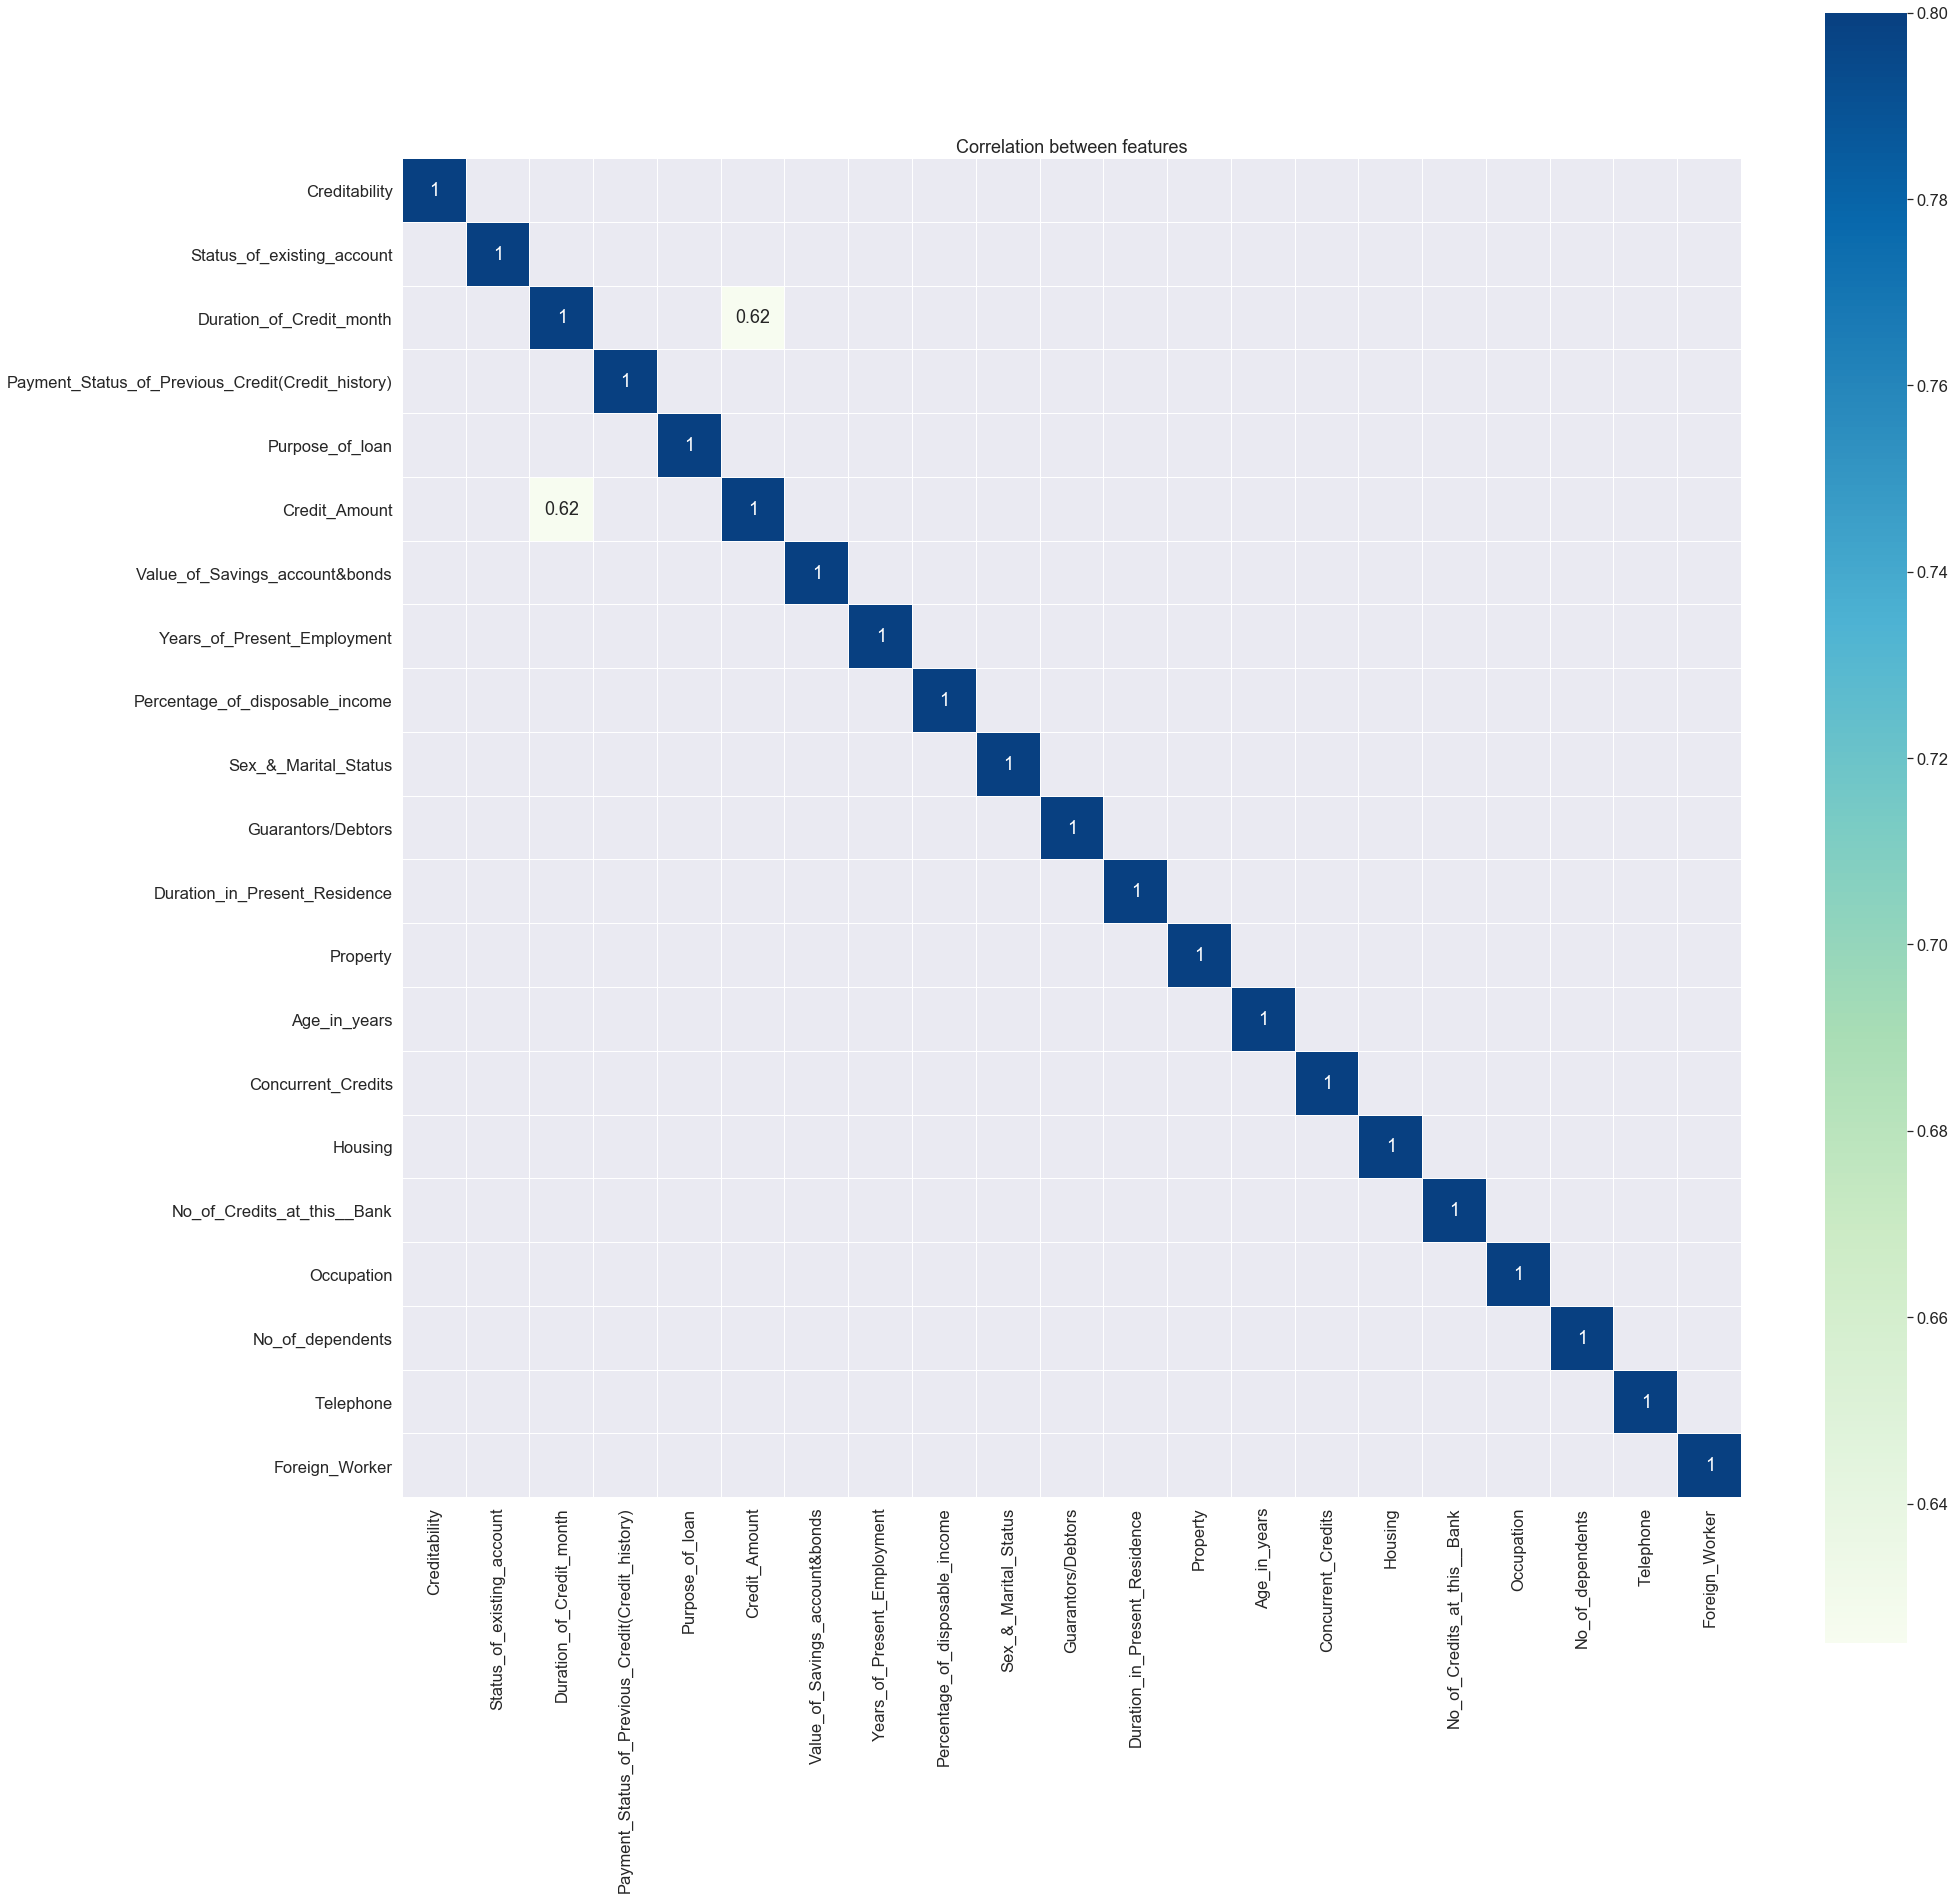

In [15]:
# Checking Correlation and correlation plot
import matplotlib.pyplot as plt
import seaborn as sns
corr=raw_data.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='GnBu',linecolor="white")
plt.title('Correlation between features')

As we can see "Credit_Amount" and "Duration_of_Credit_month" are highly correlated, we need to treat multicollinearity variables. 

<a id='modeling'></a>
# 5. Logistic Regression

<a id='prep_data'></a>
## 5.1 Preparation of Datasets

In [16]:
# Spliting Target Variable
predictor= raw_data.iloc[:, raw_data.columns != 'Creditability']
target= raw_data.iloc[:, raw_data.columns == 'Creditability']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(predictor, target, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (700, 20)
x_test  (300, 20)
y_train  (700, 1)
y_test  (300, 1)


In [18]:
import pickle
filename_1 = 'X_train.sav'
filename_12 = 'y_train.sav'
pickle.dump(x_train, open(filename_1, 'wb'))
pickle.dump(y_train, open(filename_12, 'wb'))
filename_test = 'X_test.sav'
filename_test_y = 'y_test.sav'
pickle.dump(x_test, open(filename_test, 'wb'))
pickle.dump(y_test, open(filename_test_y, 'wb'))

In [19]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()
clf.fit(x_train,y_train)
import pickle
filename_x = 'lgbm.sav'
pickle.dump(clf, open(filename_x, 'wb'))

C:\Users\skesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [20]:
# Predict values using test data
predicted_df = pd.DataFrame()
y_pred = clf.predict(x_test)
predicted_df = pd.DataFrame(y_pred, columns=['Predicted_Class'])
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_df['Predicted_Class']))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       200
           1       0.78      0.42      0.55       100

    accuracy                           0.77       300
   macro avg       0.77      0.68      0.69       300
weighted avg       0.77      0.77      0.74       300



In [21]:
import shap

In [22]:
explainer = shap.TreeExplainer(clf)

C:\Users\skesh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\skesh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.iforest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\skesh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in vers

In [23]:
explainer.expected_value

-2.1225109131044753

In [24]:
df_shap = pd.DataFrame((explainer.shap_values(x_test)[1]), columns=x_test.columns.tolist())

C:\Users\skesh\AppData\Roaming\Python\Python37\site-packages\shap\explainers\tree.py:194: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


In [25]:
df_shap

,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,Guarantors/Debtors,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1.039532,0.268374,-0.307324,1.356305,-0.370957,0.423007,-0.195090,-0.834940,0.238276,0.015016,-0.109506,0.123720,0.163047,0.465935,0.236430,-0.045100,0.133794,-0.027322,0.138296,0.043120
1,1.450178,-0.376066,0.200105,0.029235,1.391372,0.051269,0.689700,0.466877,-0.154443,0.118005,0.291234,0.888135,0.290128,-0.046206,0.039334,0.049940,0.221150,-0.042997,-0.134181,0.049397
2,0.852264,-0.313019,0.208735,0.061429,1.323446,-0.438513,0.655249,-0.678133,0.485765,0.095624,-0.015401,-0.363217,0.351922,-0.046328,-0.117151,-0.003736,0.073330,-0.064496,0.115207,0.052652
3,-1.290184,-0.443082,-0.025454,0.007774,0.535180,-0.219918,-0.525148,0.106355,0.417230,0.044334,0.262863,0.046058,0.017776,-0.068827,0.014178,0.066108,-0.051709,-0.126302,-0.151327,0.029573
4,0.401034,0.305056,0.080379,-0.337508,0.724035,0.149194,0.174809,0.244643,0.576482,-1.970432,0.110446,-0.370013,0.161143,-0.042920,0.034325,-0.010711,0.070995,0.259347,0.171908,0.037808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.967119,-0.152235,-0.834234,0.314292,0.198752,0.342162,0.488648,-0.105415,-0.110542,0.044567,0.243383,-0.143589,-0.567007,-0.101507,-0.049784,-0.047844,0.087865,-0.058260,0.148938,0.017259
296,0.453277,-0.220735,0.196199,-0.076362,-1.000575,-0.758177,0.323048,-0.214732,-0.055098,0.046318,-0.269936,0.288124,-0.202627,-0.051645,0.028630,-0.029549,-0.112317,-0.012704,0.099303,0.023809
297,1.464110,2.202990,0.040574,-0.202649,-0.135203,0.317105,-0.348373,-0.764687,-0.083234,-1.187012,-0.624729,-0.076931,-0.227159,-0.095947,0.001663,0.001400,0.110620,-0.022886,0.189974,0.021732
298,-1.428071,-0.423407,-0.318063,-0.495670,-0.318217,0.115712,-0.638982,-0.170787,-0.259758,-0.003113,-0.127259,0.214778,0.003444,0.251703,-0.027976,-0.002109,-0.000702,-0.122676,-0.032239,0.033453


In [26]:
dfxt = pd.concat([x_test,y_test], axis=1)

In [27]:
dfxt[dfxt['Creditability'] == 0].index.tolist()

[298,
 553,
 672,
 27,
 231,
 306,
 706,
 496,
 558,
 239,
 55,
 175,
 14,
 77,
 31,
 481,
 310,
 311,
 103,
 1,
 710,
 614,
 408,
 736,
 366,
 267,
 230,
 635,
 698,
 251,
 141,
 316,
 587,
 331,
 295,
 262,
 432,
 272,
 270,
 319,
 569,
 142,
 202,
 413,
 196,
 264,
 531,
 252,
 738,
 299,
 740,
 247,
 412,
 389,
 601,
 654,
 261,
 456,
 693,
 236,
 501,
 497,
 452,
 494,
 279,
 638,
 485,
 568,
 108,
 367,
 644,
 65,
 317,
 666,
 214,
 466,
 523,
 255,
 385,
 545,
 382,
 489,
 513,
 122,
 60,
 372,
 283,
 608,
 495,
 630,
 596,
 713,
 624,
 312,
 8,
 529,
 101,
 615,
 249,
 278,
 424,
 384,
 395,
 54,
 34,
 271,
 30,
 403,
 457,
 362,
 483,
 688,
 378,
 320,
 351,
 418,
 145,
 492,
 240,
 648,
 144,
 467,
 315,
 458,
 204,
 435,
 5,
 679,
 722,
 215,
 653,
 150,
 687,
 500,
 332,
 620,
 516,
 113,
 612,
 37,
 154,
 40,
 585,
 266,
 406,
 294,
 522,
 18,
 425,
 527,
 308,
 622,
 62,
 79,
 680,
 193,
 750,
 181,
 535,
 484,
 200,
 364,
 462,
 356,
 2,
 478,
 695,
 253,
 667,
 85,
 75,
 658,
 465,
 38,
 725,
 436,
 140,
 602,
 745,
 471,
 342,
 416,
 711,
 557,
 50,
 162,
 524,
 443,
 172,
 330,
 352,
 39,
 156,
 222,
 641,
 210,
 746,
 167,
 491,
 10]

45:

1. Lower age in year indicating higer chance of Bad credit
2. Lower val of status of existing acc ---> bad credit

904:

1. payment status of prev credit is low --> bad credit
2. status of existing acc is low --> bad credit
3. yrs in present emp is low --> bad credit

10:

1. Duration of credit month is low ----> low risk
2. Age in years is not so low --> low risk

14:

1. yrs in present emp is high ---> low risk
2. value of saving is hog ---> low risk


# Income Dataset

In [28]:
import shap
import xgboost
# train XGBoost model
X,y = shap.datasets.adult()
bst = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X)

# Global Feature Importance

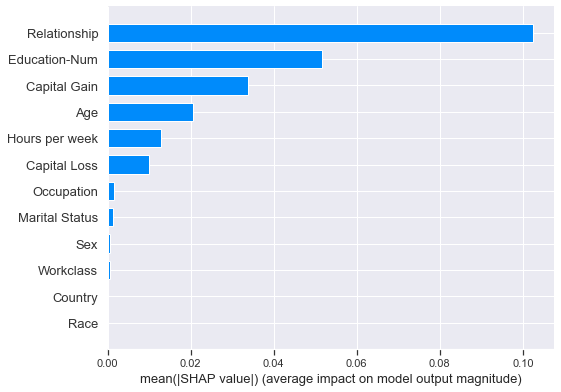

In [29]:
shap.summary_plot(shap_values, X,  plot_type = 'bar')

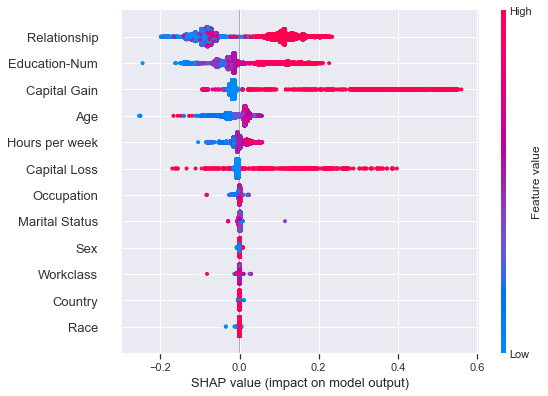

In [30]:
shap.summary_plot(shap_values, X,  plot_type = 'dot')

# Dependence Plot

Could not find feature named: None


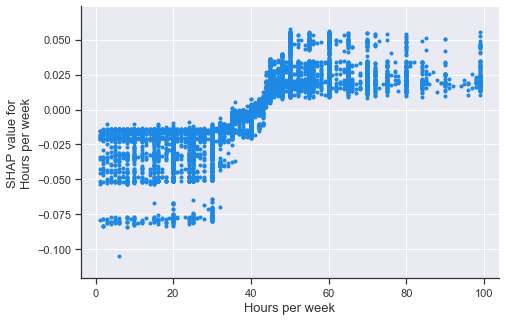

In [31]:
shap.dependence_plot('Hours per week', shap_values, X,interaction_index='None')

Could not find feature named: None


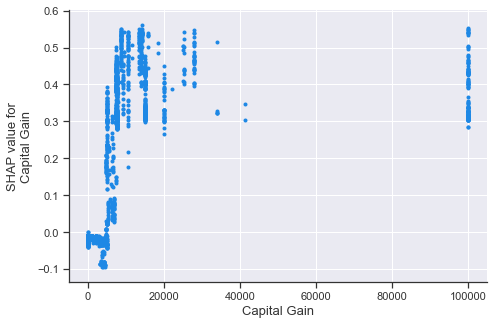

In [32]:
shap.dependence_plot('Capital Gain', shap_values, X,interaction_index='None')

Could not find feature named: None


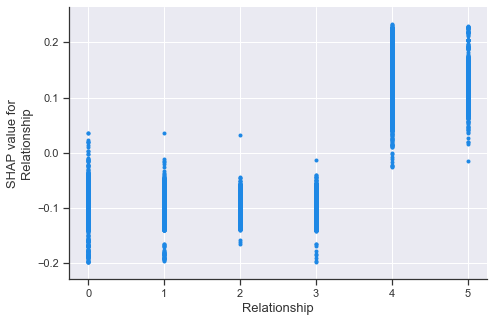

In [33]:
shap.dependence_plot('Relationship', shap_values, X,interaction_index='None')
# 0: 'Not-in-family',
# 1: 'Unmarried',
# 2: 'Other-relative',
# 3: 'Own-child',
# 4: 'Husband',
# 5: 'Wife'

# Force Plot

In [34]:
i = 198
shap_values = explainer.shap_values(X.iloc[i,:])
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[i,:])

In [35]:
i = 321
shap_values = explainer.shap_values(X.iloc[i,:])
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[i,:])

In [36]:
i = 200
shap_values = explainer.shap_values(X.iloc[i,:])
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[i,:])

# German Credit Risk Data set

In [37]:
explainer = shap.TreeExplainer(clf)
shap_values = (explainer.shap_values(x_test)[1])

C:\Users\skesh\AppData\Roaming\Python\Python37\site-packages\shap\explainers\tree.py:194: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


# Global Summary Plot

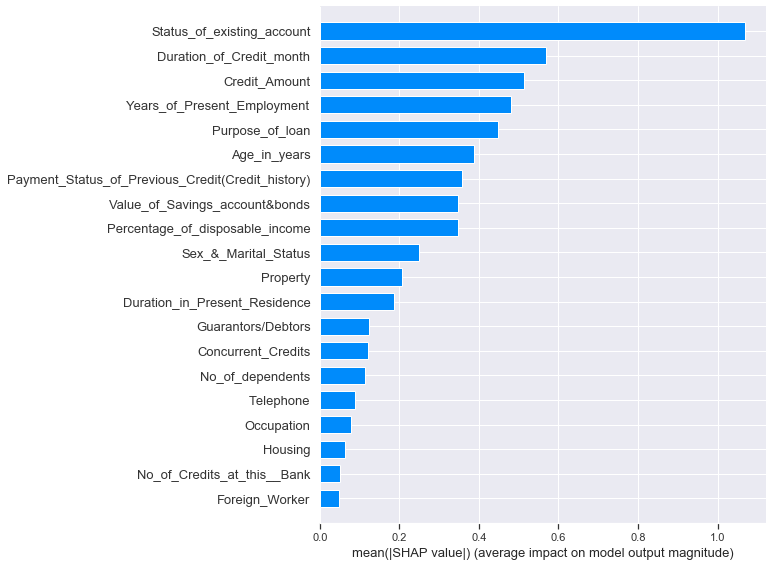

In [38]:
shap.summary_plot(shap_values, x_test,  plot_type = 'bar')

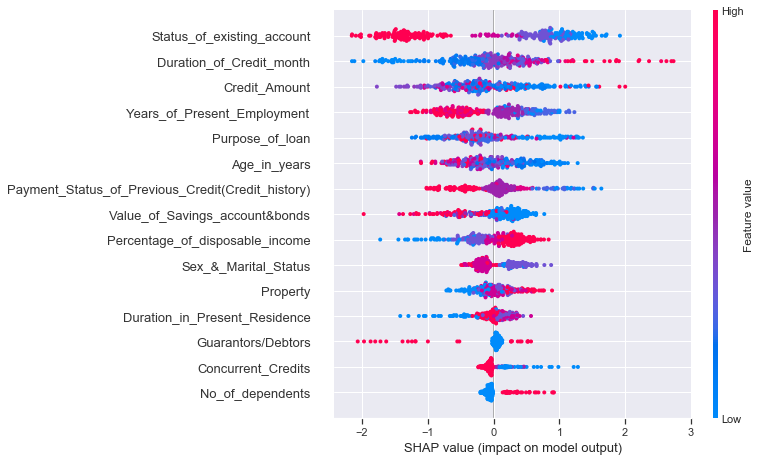

In [39]:
shap.summary_plot(shap_values, x_test,  plot_type = 'dot', max_display=15 )

# Dependence Plot

Could not find feature named: None


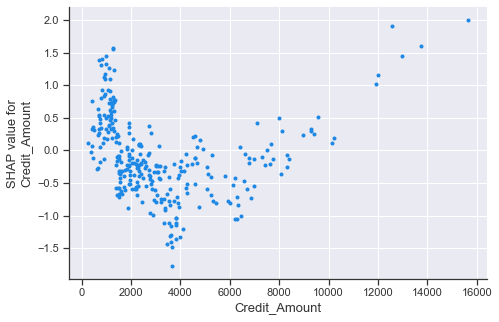

In [40]:
shap.dependence_plot('Credit_Amount', shap_values, x_test,interaction_index='None')

Could not find feature named: None


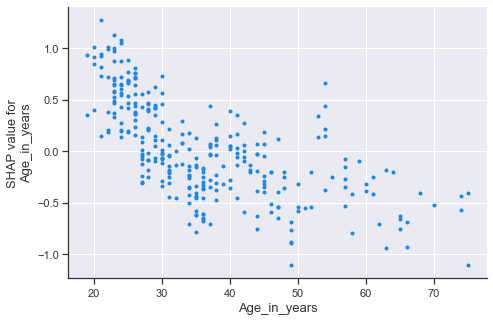

In [41]:
shap.dependence_plot('Age_in_years', shap_values, x_test,interaction_index='None')

Could not find feature named: None


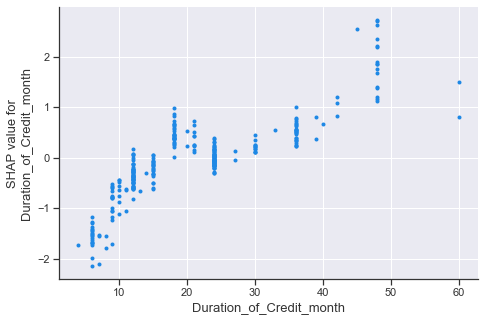

In [42]:
shap.dependence_plot('Duration_of_Credit_month', shap_values, x_test,interaction_index='None')

Could not find feature named: None


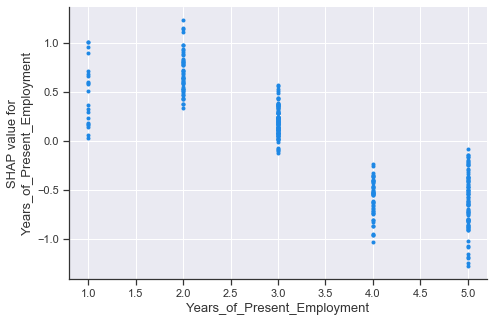

In [43]:
shap.dependence_plot('Years_of_Present_Employment', shap_values, x_test,interaction_index='None')
# Present employment since
# 1 : unemployed
# 2 : ... < 1 year
# 3 : 1 <= ... < 4 years
# 4 : 4 <= ... < 7 years
# 5 : .. >= 7 years

Could not find feature named: None


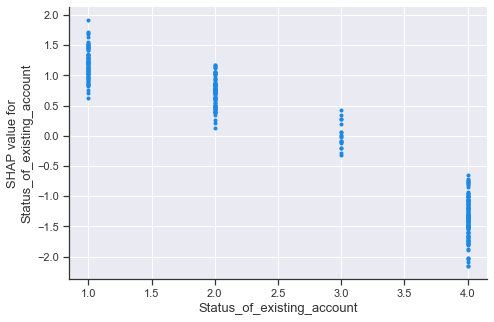

In [44]:
shap.dependence_plot('Status_of_existing_account', shap_values, x_test,interaction_index='None')

# Status_of_existing_account
# 1 : ... < 0 DM
# 2 : 0 <= ... < 200 DM
# 3 : ... >= 200 DM / salary assignments for at least 1 year
# 4 : no checking account

# Force Plot

In [52]:
i = 45
shap.initjs()
print(clf.predict_proba(x_test.loc[[i]]))
print(clf.predict(x_test.loc[[i]]))
shap_values = explainer.shap_values(x_test.loc[[i]])
shap.force_plot(explainer.expected_value[1], shap_values[1], x_test.loc[i,:], link = 'logit')

[[0.02080814 0.97919186]]
[1]


In [46]:
i = 904
print(clf.predict_proba(x_test.loc[[i]]))
print(clf.predict(x_test.loc[[i]]))
shap_values = explainer.shap_values(x_test.loc[[i]])
shap.force_plot(explainer.expected_value[1], shap_values[1], x_test.loc[i,:],link = 'logit')

[[0.2352936 0.7647064]]
[1]


In [47]:
i = 10
print(clf.predict_proba(x_test.loc[[i]]))
print(clf.predict(x_test.loc[[i]]))
shap_values = explainer.shap_values(x_test.loc[[i]])
shap.force_plot(explainer.expected_value[1], shap_values[1], x_test.loc[i,:], link = 'logit')

[[0.93235634 0.06764366]]
[0]


In [48]:
i = 18
print(clf.predict_proba(x_test.loc[[i]]))
print(clf.predict(x_test.loc[[i]]))
shap_values = explainer.shap_values(x_test.loc[[i]])
shap.force_plot(explainer.expected_value[1], shap_values[1], x_test.loc[i,:], link = 'logit')

[[0.96684072 0.03315928]]
[0]


In [49]:
# Status_of_existing_account
# 1 : ... < 0 DM
# 2 : 0 <= ... < 200 DM
# 3 : ... >= 200 DM / salary assignments for at least 1 year
# 4 : no checking account


# Present employment since
# 1 : unemployed
# 2 : ... < 1 year
# 3 : 1 <= ... < 4 years
# 4 : 4 <= ... < 7 years
# 5 : .. >= 7 years

# Payment_Status_of_Previous_Credit
# 0 : no credits taken/all credits paid back duly
# 1 : all credits at this bank paid back duly
# 2 : existing credits paid back duly till now
# 3 : delay in paying off in the past
# 4 : critical account/other credits existing (not at this bank)

#Purpose of loan
# 0 : car (new)
# 1 : car (used)
# 2 : furniture/equipment
# 3 : radio/television
# 4 : domestic appliances
# 5 : repairs
# 6 : education
# 7 : (vacation - does not exist?)
# 8 : retraining
# 9 : business
# 10 : others

In [50]:
x_test['Status_of_existing_account'].value_counts()

4    122
2     85
1     75
3     18
Name: Status_of_existing_account, dtype: int64